In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

from scipy.signal import find_peaks
from kneed import KneeLocator

import ast

O:\anaconda3\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('residues.txt').drop(['numbers'],axis=1)
convert_dic={'A':'A1', 'B':'A2', 'C':'A3', 'D':'A4', 'E':'A5', 'F':'A6', 'G':'A7', 'H':'H1', 'I':'H2', 'J':'H3', 'K':'H4', 'L':'H5', 'a':'H6', 'b':'H7'}
df['res1'] = df['res1'].apply(ast.literal_eval)
df['res2'] = df['res2'].apply(ast.literal_eval)
df['pair'] = df['chain1']+'_'+df['chain2']
#df.sort_values(by=['id'])

In [5]:
print ('\npairs with different residues in eahc chain but homomer')
print(len(df[(df['res1']!=df['res2'])&(df['chain1'] == df['chain2'])]))
#for index, row in df.iterrows():
#    if row['res1']!=row['res2']:
#        if row['chain1'] == row['chain2']:
  #          print (row['id'], row['chain1'], row['chain2'])
print ('\npairs with same residues in both chain but not homomer')
print(len(df[(df['res1']==df['res2'])&(df['chain1'] != df['chain2'])]))
#for index, row in df.iterrows():
#    if row['res1']==row['res2']:
#        if row['chain1'] != row['chain2']:
 #           print (row['id'], row['chain1'], row['chain2'])



pairs with different residues in eahc chain but homomer
346

pairs with same residues in both chain but not homomer
6


total number of residues involved in all interactions:  104

clustering the interfaces of chain A
 A got Interface with B and G from same heptamer and I and H from upper heptamer


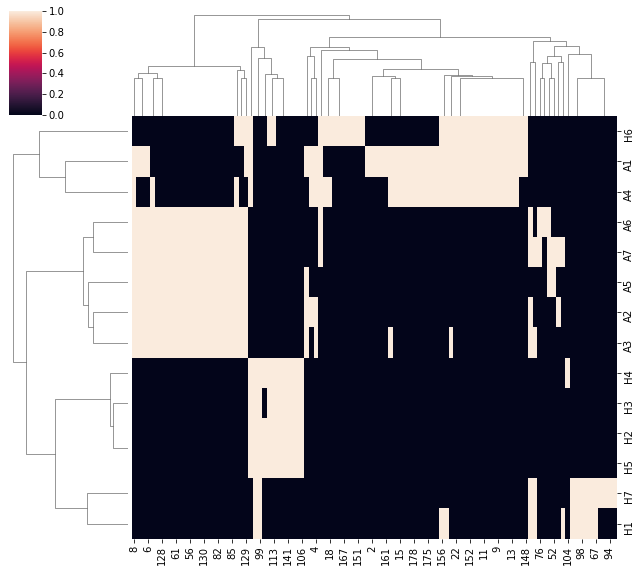

<Figure size 1800x720 with 0 Axes>

In [31]:
proteosome = df[df['id']=='5LE5']
A = proteosome[(proteosome['chain1']=='A') | (proteosome['chain2']=='A')]
residues = []
for i, row in A.iterrows():
    #print (list(row['res1']))
    residues.extend(row['res1'])
Ares = list(set(residues))
print ('total number of residues involved in all interactions: ',len(Ares))
M=np.zeros((len(Ares),len(A['chain2'])))
cn=0
for i,row in A.iterrows():
    for res in row['res1']:
        rn = Ares.index(res)
        M[rn,cn]+=1
    cn+=1
M=pd.DataFrame(M, index=Ares, columns= list(map(lambda x:convert_dic[x],A['chain2'])))
print ("\nclustering the interfaces of chain A\n A got Interface with B and G from same heptamer and I and H from upper heptamer")
sns.clustermap(M.T, figsize=(9, 8))
### group them
distances = pairwise_distances(M.values.T, metric='euclidean')
cutoff = 4.3   # Set a cutoff for the distance
Z = linkage(M.values.T, 'ward')
fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(Z)
groups = fcluster(Z, cutoff, criterion='distance')
#for i, group in enumerate(groups):
#    print(M.columns[i],'is in the group ', group)

total number of residues involved in all interactions:  118

clustering the interfaces of chain H
 H got Interface with A and G from lower heptamer and I and b from same heptamer and a and L from upper heptamer


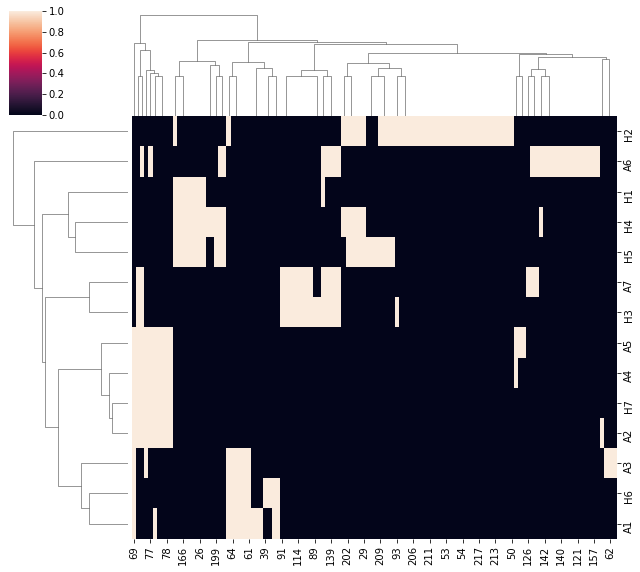

<Figure size 1800x720 with 0 Axes>

In [35]:
proteosome = df[df['id']=='5LE5']
H = proteosome[(proteosome['chain1']=='H') | (proteosome['chain2']=='H')]

residues = []
for i, row in H.iterrows():
    if row['chain1']=='H':
        residues.extend(row['res1'])
    else:
        residues.extend(row['res2'])
All_residues = list(set(residues))       
print ('total number of residues involved in all interactions: ',len(All_residues))


M=np.zeros((len(All_residues),len(H['chain2'])))
cn=0
columns=[]
for i,row in H.iterrows():
    if row['chain1']=='H':
        for res in row['res1']:
            rn = All_residues.index(res)
            M[rn,cn]+=1
        columns.append(row['chain2'])
    else:
        for res in row['res2']:
            rn = All_residues.index(res)
            M[rn,cn]+=1
        columns.append(row['chain1'])
    cn+=1

M=pd.DataFrame(M, index=All_residues, columns= list(map(lambda x:convert_dic[x],A['chain2'])))
print ("\nclustering the interfaces of chain H\n H got Interface with A and G from lower heptamer and I and b from same heptamer and a and L from upper heptamer")
sns.clustermap(M.T, figsize=(9, 8))
### group them
distances = pairwise_distances(M.values.T, metric='euclidean')
cutoff = 4.3   # Set a cutoff for the distance
Z = linkage(M.values.T, 'ward')
fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(Z)
groups = fcluster(Z, cutoff, criterion='distance')
#for i, group in enumerate(groups):
#    print(M.columns[i],'is in the group ', group)

*** just 5LE5 ***

I wanted to see wether those that are nor correctly predicted by AlphaFold are having similar interface or not
these pairs are not correctly predicted :
A_B	C_K	D_E	J_I	K_I	J_J


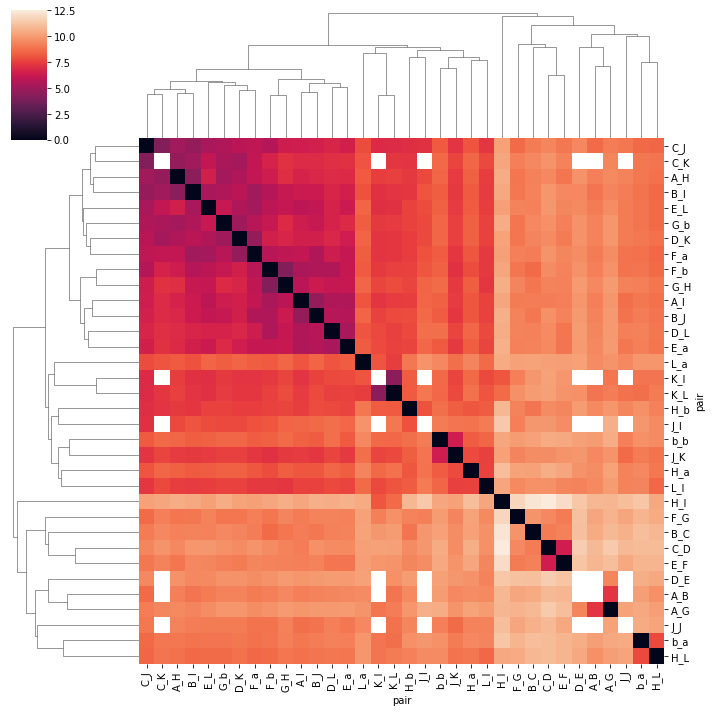

In [15]:
print ('I wanted to see wether those that are nor correctly predicted by AlphaFold are having similar interface or not')

proteosome = df[df['id']=='5LE5']
proteosome = proteosome[['pair','res1','res2']].set_index('pair')

# Remove those that do not have a contact in pdb because there's no need the cluster them (obs_contact >6)
index_list=['A_B', 'A_G', 'A_H', 'A_I', 'B_C', 'B_I', 'B_J', 'C_D', 'C_J', 'C_K', 'D_E', 'D_K', 'D_L', 'E_L', 'E_a', 'F_a', 'F_b', 'G_b', 'H_I', 'H_b', 'H_L', 'H_a', 'J_I', 'K_I', 'L_I', 'J_J', 'J_K', 'K_L', 'L_a', 'b_a', 'b_b', 'E_F', 'F_G', 'G_H']
proteosome = proteosome[proteosome.index.isin(index_list)]


all_residues = set()
for _, row in proteosome.iterrows():
    all_residues.update(row['res1'])
    all_residues.update(row['res2'])
all_residues=list(all_residues)
M=np.zeros((len(proteosome),2,len(all_residues)))

D1=0
for _, row in proteosome.iterrows():
    for res in row['res1']:
        D3 = all_residues.index(res)
        M[D1,0,D3]+=1
    for res in row['res2']:
        D3 = all_residues.index(res)
        M[D1,1,D3]+=1
    D1+=1

# reshape the Matrix to 2D and Make a DataFrame from it
from scipy.spatial.distance import pdist, squareform
M_2d = squareform(pdist(M.reshape(len(M), len(M[0][0])*2), metric='euclidean'))
M_2d=pd.DataFrame(M_2d, index=proteosome.index, columns=proteosome.index)

# Mask those that are not predicted correctly by AlphaFold
print ('these pairs are not correctly predicted :')
FNs = ['A_B', 'C_K', 'D_E', 'J_I', 'K_I', 'J_J']
print ('\t'.join(FNs))
FN_indices = [proteosome.index.get_loc(fn) for fn in FNs]
mask = np.zeros_like(M_2d)
mask[np.ix_(FN_indices, FN_indices)] = True

# Create the cluster map with the mask
sns.clustermap(M_2d, figsize=(10, 10), mask=mask)

# Show the plot
plt.show()


I wanted to see wether those that are nor correctly predicted by AlphaFold are having similar interface or not
these pairs are not correctly predicted :
A_B	C_K	D_E	J_I	K_I	J_J


O:\anaconda3\anaconda3\lib\site-packages\seaborn\matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


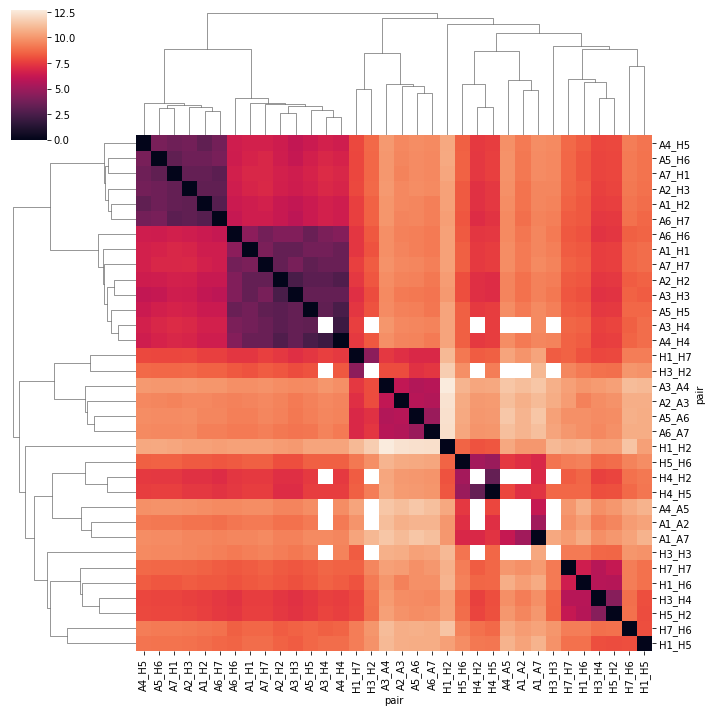

In [7]:
msa='''>A
MAE-R--GYSFSLTTFSPSGKLVQIEYALAAVAGG-APSVGIKAANGVVLATEKKQKS-ILYDERSVHKVEPITKHIGLVYSGMGPDYRVLVHRARKLAQQYY-LVYQEPIPTAQLVQRVASVMQEYT-----QSGGVRPFGVSLLICGWNE--GRPYLFQSDPSGAYFAWK-ATAMGKNYVNGKTFLEKRYN---------E--DLELEDAIHTAILTLKESFEG--Q-MTEDNIEVGICNEA----GFRRLT------PTEVKDYLAAI----A------------------------------------
>J
----------------------------------M-EYLIGIQGPDYVLVASDRVAASNIVQMKDDHDKMFKMSEKILLLCVGEAGDTVQFAEYIQKNVQLYK-MRNGYELSPTAAANFTRRNLADCL-------RSRTPYHVNLLLAGYDEH-EGPALYYMDYLAALAKAP-FAAHGYGAFLTLSILDRYYT---------P--TISRERAVELLRKCLEELQKRF-I-LNLPTFSVRIIDKN----GIHDLD------NISFPK--Q--------------------------GS---------------
>K
------------------------------------TTTLAFKFRHGVIVAADSRATAGAYIASQTVKKVIEINPYLLGTMAGGAADCSFWERLLARQCRIYE-LRNKERISVAAASKLLANMVYQYK---------GMGLSMGTMICGWDKR--GPGLYYVDSEGNRISGA-TFSVGSGSVYAYGVMDRGYS---------Y--DLEVEQAYDLARRAIYQATYRD-A-YSGGAVNLYHVRED----GWIR---VS---SDNVADLHEKYSG-STP-----------------------------------
>L
--------------RFS------------PYVFNG-GTILAIAGEDFAIVASDTRLSEGFSIHTRDSPKCYKLTDKTVIGCSGFHGDCLTLTKIIEARLKMYK-HSNNKAMTTGAIAAMLSTILYSRR---------FFPYYVYNIIGGLDEE-GKGAVYSFDPVGSYQRD-SFKAGGSASAMLQPLLDNQVGFKNMQNVEHV--PLSLDRAMRLVKDVFISAAERD-V-YTGDALRICIVTKE----GIREET-VSLRK--------------------------------------------------D-
>a
--------------TQ-------------NPMVTG-TSVLGVKFEGGVVIAADMLGSYGSLARFRNISRIMRVNNSTMLGASGDYADFQYLKQVLGQMVIDEELLGDGHSYSPRAIHSWLTRAMYSRR-------SKMNPLWNTMVIGGYADG--ESFLGYVDMLGVAYEAP-SLATGYGAYLAQPLLREVLEKQ-------P--VLSQTEARDLVERCMRVLYYRD-A-RSYNRFQIATVTEK----GVEIEGPLSTETNWDIAHMISGF----E------------------------------------
>b
------------------------------------TTIMAVQFDGGVVLGADSRTTTGSYIANRVTDKLTPIHDRIFCCRSGSAADTQAVADAVTYQLGFHS-IELNEPPLVHTAASLFKEMCYRYR----------EDLMAGIIIAGWDPQ-EGGQVYSVPMGGMMVRQS-FAIGGSGSSYIYGYVDATYR---------E--GMTKEECLQFTANALALAMERD-G-SSGGVIRLAAIAES----GVERQV-LL---GDQIPKFAVATLPPA-------------------------------------
>B
MSR----RYDSRTTIFSPEGRLYQVEYAMEAIGHA-GTCLGILANDGVLLAAERRNIHKLLDEVFFSEKIYKLNEDMACSVAGITSDANVLTNELRLIAQRYL-LQYQEPIPCEQLVTALCDIKQAYT-----QFGGKRPFGVSLLYIGWDKH-YGFQLYQSDPSGNYGGWK-ATCIGNNSAAAVSMLKQDYK---------EG-EMTLKSALALAIKVLNKTMDV--SKLSAEKVEIATLTRENGKTVIRVLK------QKEVEQLIKKH----EEEEAKAEREKKEKEQKEKDK----------------
>C
M------SYDRAITVFSPDGHLFQVEYAQEAVKKG-STAVGVRGRDIVVLGVEKKSVA-KLQDERTVRKICALDDNVCMAFAGLTADARIVINRARVECQSHR-LTVEDPVTVEYITRYIASLKQRYT-----QSNGRRPFGISALIVGFDFD-GTPRLYQTDPSGTYHAWK-ANAIGRGAKSVREFLEKNYT---------DEAIETDDLTIKLVIKALLEVVQ-----SGGKNIELAVMRRDQ---SLKILN------PEEIEKYVAEI----EKEK--EENEKKKQK--K-AS----------------
>D
MFL-TRSEYDRGVNTFSPEGRLFQVEYAIEAIKLG-STAIGIQTSEGVCLAVEKRITS-PLMEPSSIEKIVEIDAHIGCAMSGLIADAKTLIDKARVETQNHW-FTYNETMTVESVTQAVSNLALQFGEEDADPGAMSRPFGVALLFGGVDE--KGPQLFHMDPSGTFVQCD-ARAIGSASEGAQSSLQEVYH---------K--SMTLKEAIKSSLIILKQVMEE--K-LNATNIELATVQPG---QNFHMFT------KEELEEVIKD-------------------------I----------------
>E
MFR---NQYDNDVTVWSPQGRIHQIEYAMEAVKQG-SATVGLKSKTHAVLVALKRAQS-ELA--AHQKKILHVDNHIGISIAGLTADARLLCNFMRQECLDSR-FVFDRPLPVSRLVSLIGSKTQIPT-----QRYGRRPYGVGLLIAGYDDM--GPHIFQTCPSANYFDCR-AMSIGARSQSARTYLERHMS---------EFMECNLNELVKHGLRALRETLPAEQD-LTTKNVSIGIVGKDL---EFTIYD------DDDVSPFLEGL----EER-------PQRKA--Q-PAQPADEPAEKADEPMEH
>F
MSS-IGTGYDLSASTFSPDGRVFQVEYAMKAVENS-STAIGIRCKDGVVFGVEKLVLS-KLYEEGSNKRLFNVDRHVGMAVAGLLADARSLADIAREEASNFR-SNFGYNIPLKHLADRVAMYVHAYT-----LYSAVRPFGCSFMLGSYSVN-DGAQLYMIDPSGVSYGYW-GCAIGKARQAAKTEIEKLQM---------K--EMTCRDIVKEVAKIIYIVHDEV-K-DKAFELELSWVGELTN-GRHEIVP------KDIREEAEKYA----KESL---K-EEDESD--D-D-----------NM----
>G
MSRGSSAGFDRHITIFSPEGRLYQVEYAFKAINQGGLTSVAVRGKDCAVIVTQKKVPD-KLLDSSTVTHLFKITENIGCVMTGMTADSRSQVQRARYEAANWK-YKYGYEIPVDMLCKRIADISQVYT-----QNAEMRPLGCCMILIGIDEE-QGPQVYKCDPAGYYCGFK-ATAAGVKQTESTSFLEKKVK---------KKFDWTFEQTVETAITCLSTVLS-I-D-FKPSEIEVGVVTVEN--PKFRILT------EAEIDAHLVAL----AER-----------------------------D----
>H
------------------------------------TTIAGVVYKDGIVLGADTRATEGMVVADKNCSKIHFISPNIYCCGAGTAADTDMTTQLISSNLELHS-LSTGRLPRVVTANRMLKQMLFRYQ----------GYIGAALVLGGVDVT--GPHLYSIYPHGSTDKLP-YVTMGSGSLAAMAVFEDKFR---------P--DMEEEEAKNLVSEAIAAGIFND-L-GSGSNIDLCVISKN----KLDFLR------PYTVPNKKGTR----LGRYRCEKGTTAVLTEKITPLEIEVLEETVQTMDTS-
>I
--------------M-S------------IMSYNG-GAVMAMKGKNCVAIAADRRFGIQAQMVTTDFQKIFPMGDRLYIGLAGLATDVQTVAQRLKFRLNLYE-LKEGRQIKPYTLMSMVANLLYEKR---------FGPYYTEPVIAGLDPKTFKPFICSLDLIGCPMVTDDFVVSGTCAEQMYGMCESLWE---------P--NMDPDHLFETISQAMLNAVDRD-A-VSGMGVIVHIIEKD----KITTRT-LKARM--------------------------------------------------D-'''
msa=msa.split('>')[1:]
msa=list(map(lambda x:x.split('\n')[:2],msa))
msa={a[0]:a[1] for a in msa}

def map_res(lst,chain):
    seq=msa[chain]
    new_lst=[]
    for i in lst:
        counter=0
        for ii,res in enumerate(seq):
            if res != '-':
                counter += 1
                if counter==int(i):
                    new_lst.append(ii+1)
    return new_lst

print ('I wanted to see wether those that are nor correctly predicted by AlphaFold are having similar interface or not')

proteosome = df[df['id']=='5LE5']
proteosome = proteosome[['pair','res1','res2']].set_index('pair')

# Remove those that do not have a contact in pdb because there's no need the cluster them (obs_contact >6)
index_list=['A_B', 'A_G', 'A_H', 'A_I', 'B_C', 'B_I', 'B_J', 'C_D', 'C_J', 'C_K', 'D_E', 'D_K', 'D_L', 'E_L', 'E_a', 'F_a', 'F_b', 'G_b', 'H_I', 'H_b', 'H_L', 'H_a', 'J_I', 'K_I', 'L_I', 'J_J', 'J_K', 'K_L', 'L_a', 'b_a', 'b_b', 'E_F', 'F_G', 'G_H']
proteosome = proteosome[proteosome.index.isin(index_list)]

for _, row in proteosome.iterrows():
    chain1=_[0]
    chain2=_[2]
    proteosome.loc[_,'res1'] = map_res(row['res1'],chain1)
    proteosome.loc[_,'res2'] = map_res(row['res2'],chain2)


all_residues = set()
for _, row in proteosome.iterrows():
    all_residues.update(row['res1'])
    all_residues.update(row['res2'])
all_residues=list(all_residues)
M=np.zeros((len(proteosome),2,len(all_residues)))

D1=0
for _, row in proteosome.iterrows():
    for res in row['res1']:
        D3 = all_residues.index(res)
        M[D1,0,D3]+=1
    for res in row['res2']:
        D3 = all_residues.index(res)
        M[D1,1,D3]+=1
    D1+=1

# reshape the Matrix to 2D and Make a DataFrame from it
from scipy.spatial.distance import pdist, squareform
M_2d = squareform(pdist(M.reshape(len(M), len(M[0][0])*2), metric='euclidean'))
M_2d=pd.DataFrame(M_2d, index=proteosome.index, columns=proteosome.index)

# Mask those that are not predicted correctly by AlphaFold
print ('these pairs are not correctly predicted :')
FNs = ['A_B', 'C_K', 'D_E', 'J_I', 'K_I', 'J_J']
print ('\t'.join(FNs))
FN_indices = [proteosome.index.get_loc(fn) for fn in FNs]
mask = np.zeros_like(M_2d)
mask[np.ix_(FN_indices, FN_indices)] = True

convert_dic={'A':'A1', 'B':'A2', 'C':'A3', 'D':'A4', 'E':'A5', 'F':'A6', 'G':'A7', 'H':'H1', 'I':'H2', 'J':'H3', 'K':'H4', 'L':'H5', 'a':'H6', 'b':'H7'}
for column_name in M_2d.columns:
    new_column_name = convert_dic[column_name[0]]+'_'+convert_dic[column_name[2]]
    M_2d.rename(columns={column_name: new_column_name}, inplace=True)
for index_name in M_2d.index:
    new_index_name = convert_dic[index_name[0]]+'_'+convert_dic[index_name[2]]
    M_2d.rename(index={index_name: new_index_name}, inplace=True)

# Create the cluster map with the mask
sns.clustermap(M_2d, figsize=(10, 10), mask=mask)
plt.show()

O:\anaconda3\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


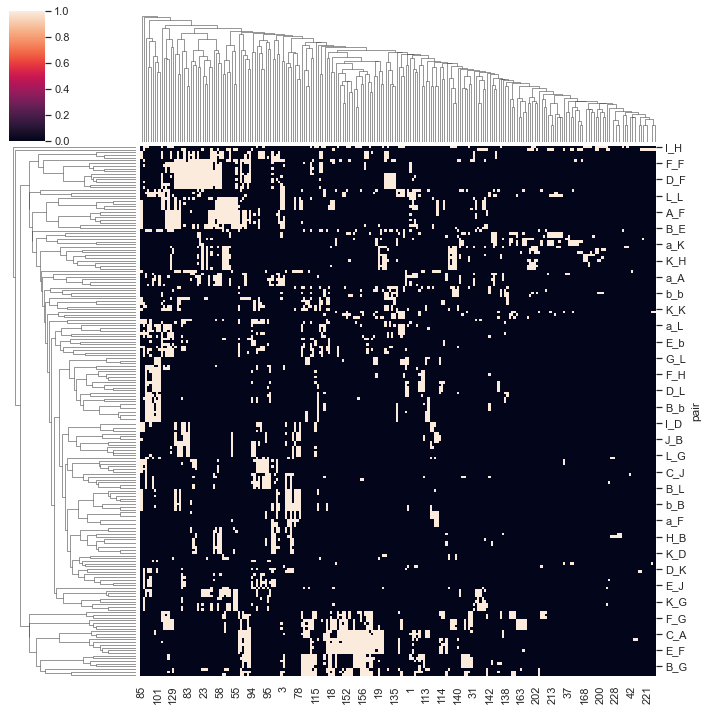

In [263]:
proteosome = df[df['id']=='5LE5']
proteosome = proteosome[['pair','res1','res2']].set_index('pair')

# Remove those that do not have a contact in pdb because there's no need the cluster them (obs_contact >6)
index_list=['A_B', 'A_G', 'A_H', 'A_I', 'B_C', 'B_I', 'B_J', 'C_D', 'C_J', 'C_K', 'D_E', 'D_K', 'D_L', 'E_L', 'E_a', 'F_a', 'F_b', 'G_b', 'H_I', 'H_b', 'H_L', 'H_a', 'J_I', 'K_I', 'L_I', 'J_J', 'J_K', 'K_L', 'L_a', 'b_a', 'b_b', 'E_F', 'F_G', 'G_H']
#proteosome = proteosome[proteosome.index.isin(index_list)]


all_residues = set()
for _, row in proteosome.iterrows():
    all_residues.update(row['res1'])
    all_residues.update(row['res2'])
all_residues=list(all_residues)

proteosome2={'pair':[], 'res':[]}
for _,row in proteosome.iterrows():
    proteosome2['pair'].append(_[0]+'_'+_[2])
    proteosome2['res'].append(row['res1'])
    if _[0] == _[2]: continue
    proteosome2['pair'].append(_[2]+'_'+_[0])
    proteosome2['res'].append(row['res2'])
proteosome2 = pd.DataFrame.from_dict(proteosome2)


M=np.zeros((len(all_residues),len(proteosome2)))
D1=0
for _, row in proteosome2.iterrows():
    for res in row['res']:
        D2 = all_residues.index(res)
        M[D2,D1]+=1
    D1+=1
M=pd.DataFrame(M, columns=proteosome2['pair'], index= all_residues)
#M = M.T[M.T.index.str.startswith('H')]
sns.clustermap(M.T, figsize=(10, 10))

In [8]:
msa='''>A
---MAERGYSFSLTTFSPSGKLVQIEYALAAVA-GGAPSVGIKAANGVVLATEKKQKSILYDERS-VHKVEPITKHIGLVYSGMGPDYRVLVHRARKLAQQYYLV-YQEPIPTAQLVQRVASVMQEYTQS-----GGVRPFGVSLLICGWNEGR-PYLFQSDPSGAYFAWKATAMGKNYVNGKTFLEKRYN--EDLELEDAIHTAILTLKESFEG--QMTEDNIEVGICNEAG----FRRLTPTEVKDYLAAIA---------------------------------
>G
MSRGSSAGFDRHITIFSPEGRLYQVEYAFKAINQGGLTSVAVRGKDCAVIVTQKKVPDKLLDSST-VTHLFKITENIGCVMTGMTADSRSQVQRARYEAANWKYK-YGYEIPVDMLCKRIADISQVYTQN-----AEMRPLGCCMILIGIDEEQGPQVYKCDPAGYYCGFKATAAGVKQTESTSFLEKKVKKKFDWTFEQTVETAITCLSTVLSI--DFKPSEIEVGVVTVENP--KFRILTEAEIDAHLVALAERD------------------------------
>B
----MSRRYDSRTTIFSPEGRLYQVEYAMEAIG-HAGTCLGILANDGVLLAAERRNIHKLLDEVFFSEKIYKLNEDMACSVAGITSDANVLTNELRLIAQRYLLQ-YQEPIPCEQLVTALCDIKQAYTQF-----GGKRPFGVSLLYIGWDKHYGFQLYQSDPSGNYGGWKATCIGNNSAAAVSMLKQDYKE-GEMTLKSALALAIKVLNKTMDVS-KLSAEKVEIATLTRENGKTVIRVLKQKEVEQLIKKHEEEEAKAEREKKEKEQKEKDK-------------
>C
------MSYDRAITVFSPDGHLFQVEYAQEAVK-KGSTAVGVRGRDIVVLGVEKKSVAKLQDERT-VRKICALDDNVCMAFAGLTADARIVINRARVECQSHRLT-VEDPVTVEYITRYIASLKQRYTQS-----NGRRPFGISALIVGFDFDGTPRLYQTDPSGTYHAWKANAIGRGAKSVREFLEKNYTDEAIETDDLTIKLVIKALLEVVQS----GGKNIELAVMRRDQS---LKILNPEEIEKYVAEIEKEKEENEKKKQKKAS------------------
>D
-MFLTRSEYDRGVNTFSPEGRLFQVEYAIEAIK-LGSTAIGIQTSEGVCLAVEKRITSPLMEPSS-IEKIVEIDAHIGCAMSGLIADAKTLIDKARVETQNHWFT-YNETMTVESVTQAVSNLALQFGEEDADPGAMSRPFGVALLFGGVDEKG-PQLFHMDPSGTFVQCDARAIGSASEGAQSSLQEVYHK--SMTLKEAIKSSLIILKQVMEE--KLNATNIELATVQPGQN---FHMFTKEELEEVIKDI----------------------------------
>F
-MSSIGTGYDLSASTFSPDGRVFQVEYAMKAVE-NSSTAIGIRCKDGVVFGVEKLVLSKLYEEGS-NKRLFNVDRHVGMAVAGLLADARSLADIAREEASNFRSN-FGYNIPLKHLADRVAMYVHAYTLY-----SAVRPFGCSFMLGSYSVNDGAQLYMIDPSGVSYGYWGCAIGKARQAAKTEIEKLQMK--EMTCRDIVKEVAKIIYIVHDEV-KDKAFELELSWVGELTNG--RHEIVPKDIREEAEKYAKESLKEEDESDDDNM------------------
>E
---MFRNQYDNDVTVWSPQGRIHQIEYAMEAVK-QGSATVGLKSKTHAVLVALKRAQSELAAHQK---KILHVDNHIGISIAGLTADARLLCNFMRQECLDSRFV-FDRPLPVSRLVSLIGSKTQIPTQR-----YGRRPYGVGLLIAGYDDMG-PHIFQTCPSANYFDCRAMSIGARSQSARTYLERHMSEFMECNLNELVKHGLRALRETLPAEQDLTTKNVSIGIVGKDLEFTIYDDDDVSPFLEGLEERPQRKAQPAQPADEPAEKADEPMEH----------
>L
--------------RFSP-------------YVFNGGTILAIAGEDFAIVASDTRLSEGFSIHTRDSPKCYKLTDKTVIGCSGFHGDCLTLTKIIEARLKMYKHS-NNKAMTTGAIAAMLSTILYSRRFF---------PYYVYNIIGGLDEEGKGAVYSFDPVGSYQRDSFKAGGSASAMLQPLLDNQVG----FKNMQNVEHVPLSLDRAMRLVKDVFISAAERDVYTGDALR--ICIVTKEGIREETVSLRKD-------------------------------
>I
----------------------------MSIMSYNGGAVMAMKGKNCVAIAADRRFGIQAQMVTTDFQKIFPMGDRLYIGLAGLATDVQTVAQRLKFRLNLYELK-EGRQIKPYTLMSMVANLLYEKRFG---------PYYTEPVIAGLDPKT------FKPFICSLDLIGCPMVTDDFVVSGTCAEQMYG-----MCESLWEPNMDPDHLFETISQAMLNAVDRDAVSGMGVI--VHIIEKDKITTRTLKARMD-------------------------------
>J
-----------------------------------MEYLIGIQGPDYVLVASDRVAASNIVQMKDDHDKMFKMSEKILLLCVGEAGDTVQFAEYIQKNVQLYKMR-NGYELSPTAAANFTRRNLADCLRS-------RTPYHVNLLLAGYDEHEGPALYYMDYLAALAKAPFAAHGYGAFLTLSILDRYYTP------TISRERAVELLRKCLEELQKRFILNLPTFSVRIIDKN-GIHDLDNISFPKQGS------------------------------------
>K
------------------------------------TTTLAFKFRHGVIVAADSRATAGAYIASQTVKKVIEINPYLLGTMAGGAADCSFWERLLARQCRIYELR-NKERISVAAASKLLANMVYQYKGMG---------LSMGTMICGWDKRG-PGLYYVDSEGNRISGATFSVGSGSVYAYGVMDRGYSY-----DLEVEQAYDLARRAIYQATYRDAYSGGAVNLYHVREDG--WIRVSSDNVADLHEKYSGSTP-----------------------------
>b
------------------------------------TTIMAVQFDGGVVLGADSRTTTGSYIANRVTDKLTPIHDRIFCCRSGSAADTQAVADAVTYQLGFHSIE-LNEPPLVHTAASLFKEMCYRYRED----------LMAGIIIAGWDPQEGGQVYSVPMGGMMVRQSFAIGGSGSSYIYGYVDATYREG-----MTKEECLQFTANALALAMERDGSSGGVIRLAAIAESGVERQVLLGDQIPKFAVATLPPA------------------------------
>H
------------------------------------TTIAGVVYKDGIVLGADTRATEGMVVADKNCSKIHFISPNIYCCGAGTAADTDMTTQLISSNLELHSLS-TGRLPRVVTANRMLKQMLFRYQGY----------IGAALVLGGVDVTG-PHLYSIYPHGSTDKLPYVTMGSGSLAAMAVFEDKFRP-----DMEEEEAKNLVSEAIAAGIFNDLGSGSNIDLCVISKNKLDFLRPYTVPNKKGTRLGRYRCEKGTTAVLTEKITPLEIEVLEETVQTMDTS
>a
----------------------------TQNPMVTGTSVLGVKFEGGVVIAADMLGSYGSLARFRNISRIMRVNNSTMLGASGDYADFQYLKQVLGQMVIDEELLGDGHSYSPRAIHSWLTRAMYSRRSK-------MNPLWNTMVIGGYADGE-SFLGYVDMLGVAYEAPSLATGYGAYLAQPLLREVLEK---QPVLSQTEARDLVERCMRVLYYRDARSYNRFQIATVTEKGVEIEGPLSTETNWDIAHMISGFE-----------------------------'''
msa=msa.split('>')[1:]
msa=list(map(lambda x:x.split('\n')[:2],msa))
msa={a[0]:a[1] for a in msa}

def map_res(lst,chain):
    seq=msa[chain]
    new_lst=[]
    for i in lst:
        counter=0
        for ii,res in enumerate(seq):
            if res != '-':
                counter += 1
                if counter==int(i):
                    new_lst.append(ii+1)
    return new_lst

O:\anaconda3\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


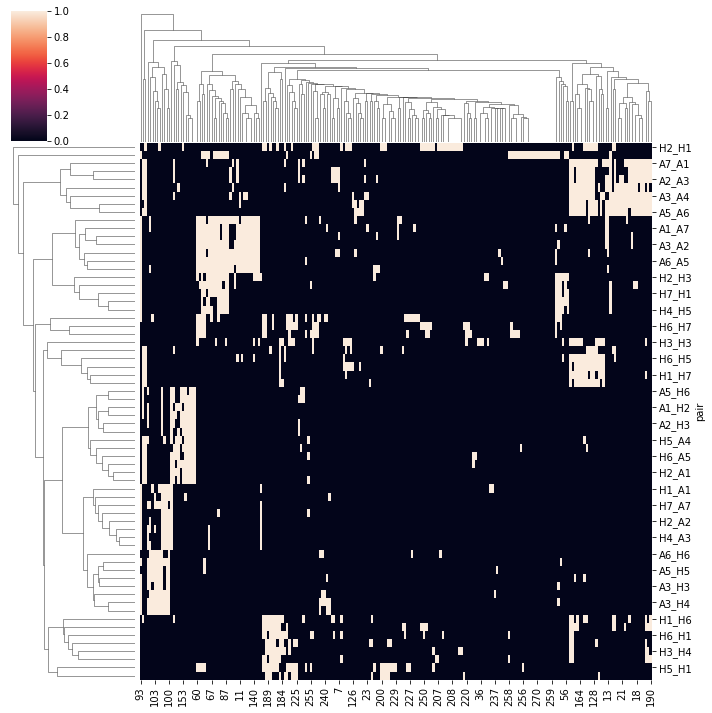

In [10]:
proteosome = df[df['id']=='5LE5']
proteosome = proteosome[['pair','res1','res2']].set_index('pair')

# Remove those that do not have a contact in pdb because there's no need the cluster them (obs_contact >6)
index_list=['A_B', 'A_G', 'A_H', 'A_I', 'B_C', 'B_I', 'B_J', 'C_D', 'C_J', 'C_K', 'D_E', 'D_K', 'D_L', 'E_L', 'E_a', 'F_a', 'F_b', 'G_b', 'H_I', 'H_b', 'H_L', 'H_a', 'J_I', 'K_I', 'L_I', 'J_J', 'J_K', 'K_L', 'L_a', 'b_a', 'b_b', 'E_F', 'F_G', 'G_H']
proteosome = proteosome[proteosome.index.isin(index_list)]

proteosome2={'pair':[], 'res':[]}
for _,row in proteosome.iterrows():
    proteosome2['pair'].append(_[0]+'_'+_[2])
    proteosome2['res'].append(row['res1'])
    if _[0] == _[2]: continue
    proteosome2['pair'].append(_[2]+'_'+_[0])
    proteosome2['res'].append(row['res2'])
proteosome2 = pd.DataFrame.from_dict(proteosome2)

for _, row in proteosome2.iterrows():
    chain=row['pair'][0]
    proteosome2.loc[_,'res'] = map_res(row['res'],chain)


all_residues = set()
for _, row in proteosome2.iterrows():
    all_residues.update(row['res'])
all_residues=list(all_residues)
    
M=np.zeros((len(all_residues),len(proteosome2)))
D1=0
for _, row in proteosome2.iterrows():
    for res in row['res']:
        D2 = all_residues.index(res)
        M[D2,D1]+=1
    D1+=1

M=pd.DataFrame(M, columns=proteosome2['pair'], index= all_residues)
for column_name in M.columns:
    new_column_name = convert_dic[column_name[0]]+'_'+convert_dic[column_name[2]]
    M.rename(columns={column_name: new_column_name}, inplace=True)
#M = M.T[M.T.index.str.startswith('H')]
sns.clustermap(M.T, figsize=(10, 10))
#proteosome2[proteosome2['pair'].str.contains('A_')]


In [301]:
msa='''>A
MAE-R--GYSFSLTTFSPSGKLVQIEYALAAVAGG-APSVGIKAANGVVLATEKKQKS-ILYDERSVHKVEPITKHIGLVYSGMGPDYRVLVHRARKLAQQYY-LVYQEPIPTAQLVQRVASVMQEYT-----QSGGVRPFGVSLLICGWNE--GRPYLFQSDPSGAYFAWK-ATAMGKNYVNGKTFLEKRYN---------E--DLELEDAIHTAILTLKESFEG--Q-MTEDNIEVGICNEA----GFRRLT------PTEVKDYLAAI----A------------------------------------
>J
----------------------------------M-EYLIGIQGPDYVLVASDRVAASNIVQMKDDHDKMFKMSEKILLLCVGEAGDTVQFAEYIQKNVQLYK-MRNGYELSPTAAANFTRRNLADCL-------RSRTPYHVNLLLAGYDEH-EGPALYYMDYLAALAKAP-FAAHGYGAFLTLSILDRYYT---------P--TISRERAVELLRKCLEELQKRF-I-LNLPTFSVRIIDKN----GIHDLD------NISFPK--Q--------------------------GS---------------
>K
------------------------------------TTTLAFKFRHGVIVAADSRATAGAYIASQTVKKVIEINPYLLGTMAGGAADCSFWERLLARQCRIYE-LRNKERISVAAASKLLANMVYQYK---------GMGLSMGTMICGWDKR--GPGLYYVDSEGNRISGA-TFSVGSGSVYAYGVMDRGYS---------Y--DLEVEQAYDLARRAIYQATYRD-A-YSGGAVNLYHVRED----GWIR---VS---SDNVADLHEKYSG-STP-----------------------------------
>L
--------------RFS------------PYVFNG-GTILAIAGEDFAIVASDTRLSEGFSIHTRDSPKCYKLTDKTVIGCSGFHGDCLTLTKIIEARLKMYK-HSNNKAMTTGAIAAMLSTILYSRR---------FFPYYVYNIIGGLDEE-GKGAVYSFDPVGSYQRD-SFKAGGSASAMLQPLLDNQVGFKNMQNVEHV--PLSLDRAMRLVKDVFISAAERD-V-YTGDALRICIVTKE----GIREET-VSLRK--------------------------------------------------D-
>a
--------------TQ-------------NPMVTG-TSVLGVKFEGGVVIAADMLGSYGSLARFRNISRIMRVNNSTMLGASGDYADFQYLKQVLGQMVIDEELLGDGHSYSPRAIHSWLTRAMYSRR-------SKMNPLWNTMVIGGYADG--ESFLGYVDMLGVAYEAP-SLATGYGAYLAQPLLREVLEKQ-------P--VLSQTEARDLVERCMRVLYYRD-A-RSYNRFQIATVTEK----GVEIEGPLSTETNWDIAHMISGF----E------------------------------------
>b
------------------------------------TTIMAVQFDGGVVLGADSRTTTGSYIANRVTDKLTPIHDRIFCCRSGSAADTQAVADAVTYQLGFHS-IELNEPPLVHTAASLFKEMCYRYR----------EDLMAGIIIAGWDPQ-EGGQVYSVPMGGMMVRQS-FAIGGSGSSYIYGYVDATYR---------E--GMTKEECLQFTANALALAMERD-G-SSGGVIRLAAIAES----GVERQV-LL---GDQIPKFAVATLPPA-------------------------------------
>B
MSR----RYDSRTTIFSPEGRLYQVEYAMEAIGHA-GTCLGILANDGVLLAAERRNIHKLLDEVFFSEKIYKLNEDMACSVAGITSDANVLTNELRLIAQRYL-LQYQEPIPCEQLVTALCDIKQAYT-----QFGGKRPFGVSLLYIGWDKH-YGFQLYQSDPSGNYGGWK-ATCIGNNSAAAVSMLKQDYK---------EG-EMTLKSALALAIKVLNKTMDV--SKLSAEKVEIATLTRENGKTVIRVLK------QKEVEQLIKKH----EEEEAKAEREKKEKEQKEKDK----------------
>C
M------SYDRAITVFSPDGHLFQVEYAQEAVKKG-STAVGVRGRDIVVLGVEKKSVA-KLQDERTVRKICALDDNVCMAFAGLTADARIVINRARVECQSHR-LTVEDPVTVEYITRYIASLKQRYT-----QSNGRRPFGISALIVGFDFD-GTPRLYQTDPSGTYHAWK-ANAIGRGAKSVREFLEKNYT---------DEAIETDDLTIKLVIKALLEVVQ-----SGGKNIELAVMRRDQ---SLKILN------PEEIEKYVAEI----EKEK--EENEKKKQK--K-AS----------------
>D
MFL-TRSEYDRGVNTFSPEGRLFQVEYAIEAIKLG-STAIGIQTSEGVCLAVEKRITS-PLMEPSSIEKIVEIDAHIGCAMSGLIADAKTLIDKARVETQNHW-FTYNETMTVESVTQAVSNLALQFGEEDADPGAMSRPFGVALLFGGVDE--KGPQLFHMDPSGTFVQCD-ARAIGSASEGAQSSLQEVYH---------K--SMTLKEAIKSSLIILKQVMEE--K-LNATNIELATVQPG---QNFHMFT------KEELEEVIKD-------------------------I----------------
>E
MFR---NQYDNDVTVWSPQGRIHQIEYAMEAVKQG-SATVGLKSKTHAVLVALKRAQS-ELA--AHQKKILHVDNHIGISIAGLTADARLLCNFMRQECLDSR-FVFDRPLPVSRLVSLIGSKTQIPT-----QRYGRRPYGVGLLIAGYDDM--GPHIFQTCPSANYFDCR-AMSIGARSQSARTYLERHMS---------EFMECNLNELVKHGLRALRETLPAEQD-LTTKNVSIGIVGKDL---EFTIYD------DDDVSPFLEGL----EER-------PQRKA--Q-PAQPADEPAEKADEPMEH
>F
MSS-IGTGYDLSASTFSPDGRVFQVEYAMKAVENS-STAIGIRCKDGVVFGVEKLVLS-KLYEEGSNKRLFNVDRHVGMAVAGLLADARSLADIAREEASNFR-SNFGYNIPLKHLADRVAMYVHAYT-----LYSAVRPFGCSFMLGSYSVN-DGAQLYMIDPSGVSYGYW-GCAIGKARQAAKTEIEKLQM---------K--EMTCRDIVKEVAKIIYIVHDEV-K-DKAFELELSWVGELTN-GRHEIVP------KDIREEAEKYA----KESL---K-EEDESD--D-D-----------NM----
>G
MSRGSSAGFDRHITIFSPEGRLYQVEYAFKAINQGGLTSVAVRGKDCAVIVTQKKVPD-KLLDSSTVTHLFKITENIGCVMTGMTADSRSQVQRARYEAANWK-YKYGYEIPVDMLCKRIADISQVYT-----QNAEMRPLGCCMILIGIDEE-QGPQVYKCDPAGYYCGFK-ATAAGVKQTESTSFLEKKVK---------KKFDWTFEQTVETAITCLSTVLS-I-D-FKPSEIEVGVVTVEN--PKFRILT------EAEIDAHLVAL----AER-----------------------------D----
>H
------------------------------------TTIAGVVYKDGIVLGADTRATEGMVVADKNCSKIHFISPNIYCCGAGTAADTDMTTQLISSNLELHS-LSTGRLPRVVTANRMLKQMLFRYQ----------GYIGAALVLGGVDVT--GPHLYSIYPHGSTDKLP-YVTMGSGSLAAMAVFEDKFR---------P--DMEEEEAKNLVSEAIAAGIFND-L-GSGSNIDLCVISKN----KLDFLR------PYTVPNKKGTR----LGRYRCEKGTTAVLTEKITPLEIEVLEETVQTMDTS-
>I
--------------M-S------------IMSYNG-GAVMAMKGKNCVAIAADRRFGIQAQMVTTDFQKIFPMGDRLYIGLAGLATDVQTVAQRLKFRLNLYE-LKEGRQIKPYTLMSMVANLLYEKR---------FGPYYTEPVIAGLDPKTFKPFICSLDLIGCPMVTDDFVVSGTCAEQMYGMCESLWE---------P--NMDPDHLFETISQAMLNAVDRD-A-VSGMGVIVHIIEKD----KITTRT-LKARM--------------------------------------------------D-'''
msa=msa.split('>')[1:]
msa=list(map(lambda x:x.split('\n')[:2],msa))
msa={a[0]:a[1] for a in msa}

def map_res(lst,chain):
    seq=msa[chain]
    new_lst=[]
    for i in lst:
        counter=0
        for ii,res in enumerate(seq):
            if res != '-':
                counter += 1
                if counter==int(i):
                    new_lst.append(ii+1)
    return new_lst

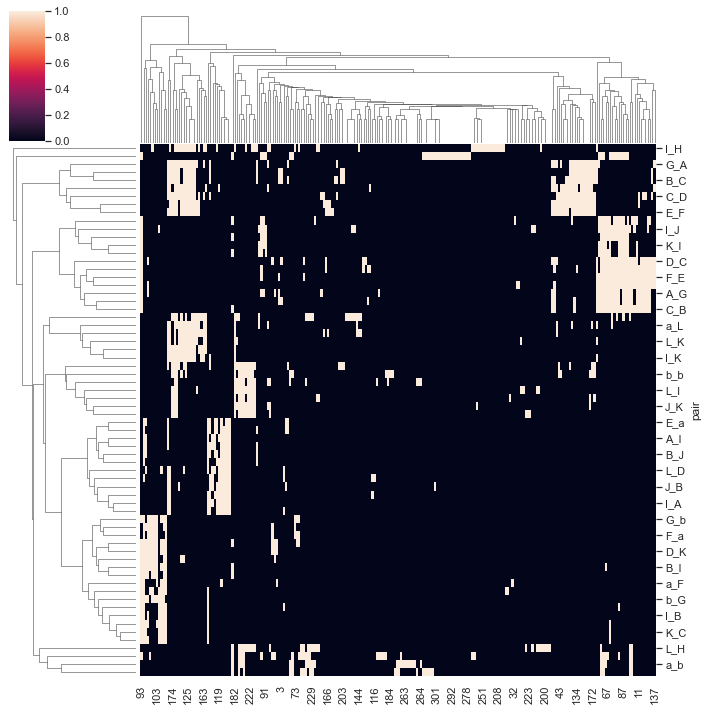

In [302]:
proteosome = df[df['id']=='5LE5']
proteosome = proteosome[['pair','res1','res2']].set_index('pair')

# Remove those that do not have a contact in pdb because there's no need the cluster them (obs_contact >6)
index_list=['A_B', 'A_G', 'A_H', 'A_I', 'B_C', 'B_I', 'B_J', 'C_D', 'C_J', 'C_K', 'D_E', 'D_K', 'D_L', 'E_L', 'E_a', 'F_a', 'F_b', 'G_b', 'H_I', 'H_b', 'H_L', 'H_a', 'J_I', 'K_I', 'L_I', 'J_J', 'J_K', 'K_L', 'L_a', 'b_a', 'b_b', 'E_F', 'F_G', 'G_H']
proteosome = proteosome[proteosome.index.isin(index_list)]

proteosome2={'pair':[], 'res':[]}
for _,row in proteosome.iterrows():
    proteosome2['pair'].append(_[0]+'_'+_[2])
    proteosome2['res'].append(row['res1'])
    if _[0] == _[2]: continue
    proteosome2['pair'].append(_[2]+'_'+_[0])
    proteosome2['res'].append(row['res2'])
proteosome2 = pd.DataFrame.from_dict(proteosome2)

for _, row in proteosome2.iterrows():
    chain=row['pair'][0]
    proteosome2.loc[_,'res'] = map_res(row['res'],chain)


all_residues = set()
for _, row in proteosome2.iterrows():
    all_residues.update(row['res'])
all_residues=list(all_residues)
    
M=np.zeros((len(all_residues),len(proteosome2)))
D1=0
for _, row in proteosome2.iterrows():
    for res in row['res']:
        D2 = all_residues.index(res)
        M[D2,D1]+=1
    D1+=1
M=pd.DataFrame(M, columns=proteosome2['pair'], index= all_residues)
#M = M.T[M.T.index.str.startswith('H')]
sns.clustermap(M.T, figsize=(10, 10))
#proteosome2[proteosome2['pair'].str.contains('A_')]


In [36]:
df = pd.read_csv('5LE5_residues_dataframe.txt')
df['res1'] = df['res1'].apply(ast.literal_eval)
df['res2'] = df['res2'].apply(ast.literal_eval)
df['pair'] = df['chain1']+'_'+df['chain2']+'_'+df['rank'].astype(str)
df

,chain1,chain2,rank,res1,res2,pair
0,a,a,0,"[2, 3, 4, 5, 7, 9, 29, 30, 32, 35, 100, 103, 1...","[2, 3, 4, 5, 7, 9, 29, 30, 32, 35, 100, 103, 1...",a_a_0
1,A,a,0,"[9, 11, 13, 18, 19, 20, 21, 22, 23, 25, 26, 29...","[1, 2, 3, 4, 5, 6, 30, 32, 33, 35, 36, 39, 56,...",A_a_0
2,A,A,0,"[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[1, 2, 3, 4, 6, 7, 8, 10, 11, 20, 21, 23, 24, ...",A_A_0
3,a,a,1,"[3, 4, 7, 9, 10, 32, 33, 34, 100, 107, 109, 12...","[3, 4, 7, 9, 10, 32, 33, 100, 107, 109, 126, 1...",a_a_1
4,A,a,1,"[7, 9, 11, 12, 13, 18, 19, 20, 21, 22, 23, 26,...","[1, 2, 3, 4, 5, 6, 30, 32, 35, 36, 39, 56, 57,...",A_a_1
...,...,...,...,...,...,...
520,L,L,0,"[1, 3, 4, 5, 6, 7, 30, 33, 34, 35, 97, 100, 10...","[1, 3, 4, 5, 6, 7, 30, 33, 34, 35, 97, 100, 10...",L_L_0
521,L,L,1,"[1, 2, 3, 4, 5, 7, 33, 93, 97, 100, 101, 102, ...","[1, 2, 3, 4, 5, 7, 33, 93, 97, 100, 101, 102, ...",L_L_1
522,L,L,2,"[1, 2, 3, 4, 5, 6, 7, 33, 93, 101, 102, 103, 1...","[1, 2, 3, 4, 5, 6, 7, 33, 93, 101, 102, 103, 1...",L_L_2
523,L,L,3,"[1, 2, 3, 4, 5, 7, 30, 33, 34, 100, 101, 102, ...","[1, 2, 3, 4, 5, 7, 30, 33, 34, 100, 101, 102, ...",L_L_3


total number of residues involved in all interactions:  91

clustering the interfaces of chain A
 A got Interface with B and G from same heptamer and I and H from upper heptamer


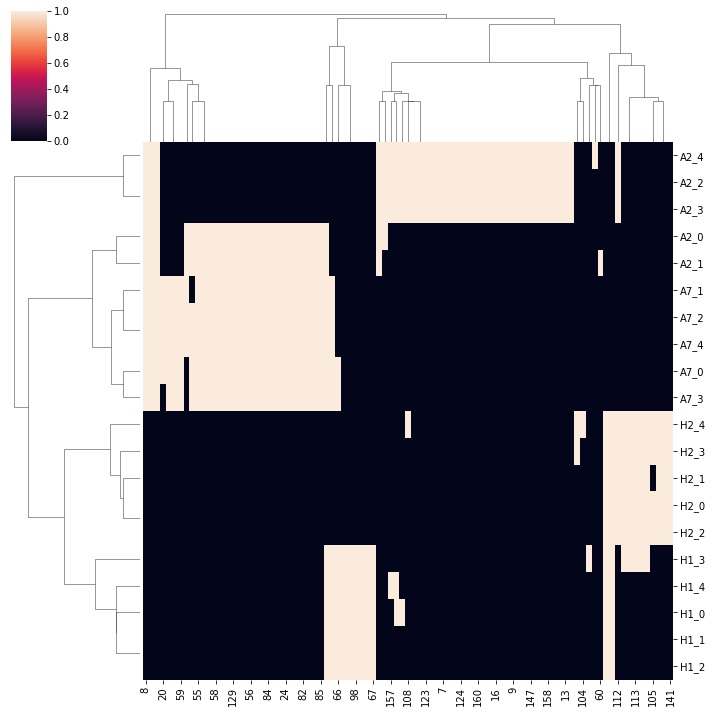

O:\anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
O:\anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
O:\anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
O:\anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

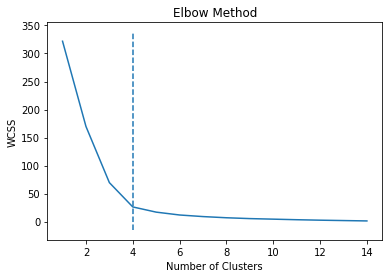

In [47]:
proteosome = df.copy()
A = proteosome[(proteosome['chain1']=='A') | (proteosome['chain2']=='A')]
A = A[A['chain2'].isin(['B', 'H', 'G', 'I'])] # only contacing pairs
residues = []
for i, row in A.iterrows():
    residues.extend(row['res1'])
    
Ares = list(set(residues))
print ('total number of residues involved in all interactions: ',len(Ares))
M=np.zeros((len(Ares),len(A['chain2'])))
cn=0
for i,row in A.iterrows():
    for res in row['res1']:
        rn = Ares.index(res)
        M[rn,cn]+=1
    cn+=1
M=pd.DataFrame(M, index=Ares, columns= list(map(lambda x: convert_dic[x[2]]+x[3:],A['pair'])))
print ("\nclustering the interfaces of chain A\n A got Interface with B and G from same heptamer and I and H from upper heptamer")
sns.clustermap(M.T,figsize=(10, 10))
plt.show()

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(M.T.to_numpy())
    wcss.append(kmeans.inertia_)
# Find the knee point using the KneeLocator module
kl = KneeLocator(range(1, 15), wcss, curve='convex', direction='decreasing')
knee = kl.elbow

plt.plot(range(1, 15), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.vlines(knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

total number of residues involved in all interactions:  115

clustering the interfaces of chain H
 H got Interface with A and G from lower heptamer and I and N(auth b) from same heptamer and a and L from upper heptamer


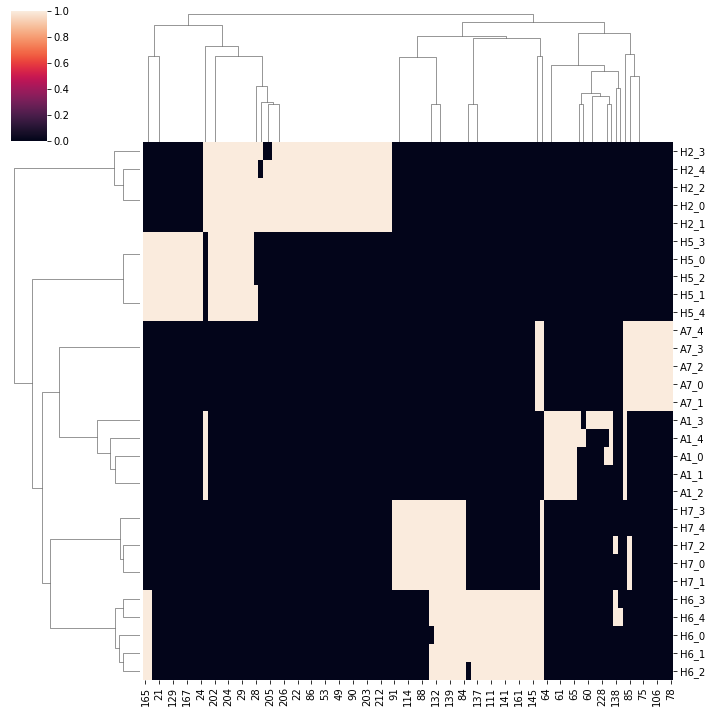

O:\anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
O:\anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
O:\anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
O:\anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

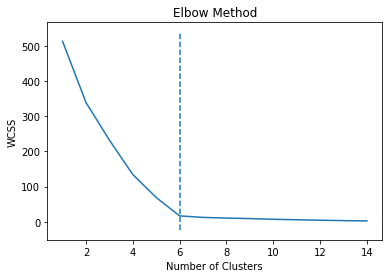

In [55]:
proteosome = df.copy()
H = proteosome[(proteosome['chain1']=='H') | (proteosome['chain2']=='H')]
H = H[(H.chain1.isin(['A', 'I', 'G', 'L', 'a', 'b'])) | (H.chain2.isin(['A', 'I', 'G', 'L', 'a', 'b']))] # only contacing pairs

residues = []
for i, row in H.iterrows():
    if row['chain1']=='H':
        residues.extend(row['res1'])
    else:
        residues.extend(row['res2'])
All_residues = list(set(residues))       
print ('total number of residues involved in all interactions: ',len(All_residues))


M=np.zeros((len(All_residues),len(H['chain2'])))
cn=0
columns=[]
for i,row in H.iterrows():
    if row['chain1']=='H':
        for res in row['res1']:
            rn = All_residues.index(res)
            M[rn,cn]+=1
        columns.append(row['pair'][2:])
    else:
        for res in row['res2']:
            rn = All_residues.index(res)
            M[rn,cn]+=1
        columns.append(row['pair'][0]+'_'+row['pair'][-1])
    cn+=1

M=pd.DataFrame(M, index=All_residues, columns= list(map(lambda x: convert_dic[x[0]]+x[1:],columns)))
print ("\nclustering the interfaces of chain H\n H got Interface with A and G from lower heptamer and I and N(auth b) from same heptamer and a and L from upper heptamer")
sns.clustermap(M.T, figsize=(10, 10))
plt.show()

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(M.T.to_numpy())
    wcss.append(kmeans.inertia_)
    
# Find the knee point using the KneeLocator module
kl = KneeLocator(range(1, 15), wcss, curve='convex', direction='decreasing')
knee = kl.elbow

plt.plot(range(1, 15), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.vlines(knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()